In [1]:
!python3 --version

Python 3.5.2


Image shape is: 	 (64, 64, 3)


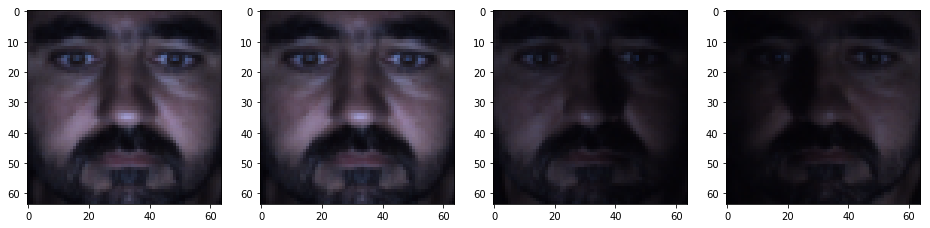

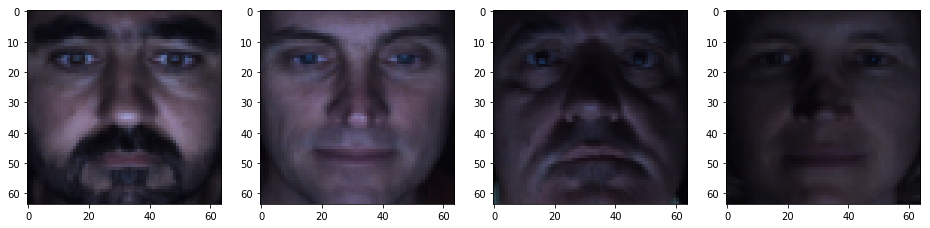

In [78]:
from skimage.io import imread
from skimage.transform import resize
import numpy as np
import matplotlib.pyplot as plt

def GetImagePath(sub, sess, frame):
    """
    Function: get image path name according to the inputs
    """
    # read the image path
    folder_name = "sub" + str(sub) + "_session" + str(sess)
    image_path = folder_name + "/" + folder_name + "_frame" + str(frame) + ".png"
    
    return image_path

def ReadImage(image_path):
    """
    Function:
        Read and resize images with specific subname, session name and frame name.
    """
    # read the image
    image = imread(image_path)
    # resize the image
    output_size = (64, 64)
    image = resize(image, output_size)
    
    return image


# define all the sub names, session names, and frame names into np.array
sub_names_train = np.arange(1, 11)
sub_names_test = np.concatenate([np.arange(31, 39), np.array([40])], axis = -1)
session_names = np.arange(1, 3)
frame_names_train = np.arange(1, 24)
frame_names_test = np.arange(1, 25)

# image examples, for visualization and some tests
# same faces
path_example_1 = GetImagePath(sub_names_train[0], session_names[0], frame_names_train[0])
image_example_1 = ReadImage(path_example_1)
path_example_2 = GetImagePath(sub_names_train[0], session_names[1], frame_names_train[0])
image_example_2 = ReadImage(path_example_2)
path_example_3 = GetImagePath(sub_names_train[0], session_names[0], frame_names_train[10])
image_example_3 = ReadImage(path_example_3)
path_example_4 = GetImagePath(sub_names_train[0], session_names[0], frame_names_train[22])
image_example_4 = ReadImage(path_example_4)
# different faces
path_example_5 = GetImagePath(sub_names_train[1], session_names[0], frame_names_train[0])
image_example_5 = ReadImage(path_example_5)
path_example_6 = GetImagePath(sub_names_train[5], session_names[0], frame_names_train[5])
image_example_6 = ReadImage(path_example_6)
path_example_7 = GetImagePath(sub_names_test[5], session_names[0], frame_names_test[22])
image_example_7 = ReadImage(path_example_7)

# print out the shape of the image
print("Image shape is: \t", image_example_1.shape)

# same faces test
fig = plt.figure(figsize = (16, 4))
ax1 = fig.add_subplot(141)
ax2 = fig.add_subplot(142)
ax3 = fig.add_subplot(143)
ax4 = fig.add_subplot(144)
ax1.imshow(image_example_1)
ax2.imshow(image_example_2)
ax3.imshow(image_example_3)
ax4.imshow(image_example_4)
plt.show()

# different faces test
fig = plt.figure(figsize = (16, 4))
ax1 = fig.add_subplot(141)
ax2 = fig.add_subplot(142)
ax3 = fig.add_subplot(143)
ax4 = fig.add_subplot(144)
ax1.imshow(image_example_1)
ax2.imshow(image_example_5)
ax3.imshow(image_example_6)
ax4.imshow(image_example_7)
plt.show()


In [79]:

def NormalizedCrossCorrelation(image1, image2):
    """
    Funtion: calculating normalized cross correlation (NCC) between two images
    """
    numerator = np.sum((image1 - np.mean(image1)) * (image2 - np.mean(image2)))
    denominator = np.sqrt(np.sum(np.square(image1 - np.mean(image1))) * \
                          np.sum(np.square(image2 - np.mean(image2))))
    return numerator / denominator

def CrossCorrelation(image1, image2):
    """
    Function: original cross correlation between two images
    """
    return np.sum((image1 - image1.mean()) * (image2 - image2.mean()))

def Convolution(image1, image2):
    """
    Funtion: calculating convolution between two images
    """
    return np.sum(np.flip((image1 - image1.mean())) * image2)

def SumSquareDifferences(image1, image2):
    """
    Funtion: calculating pixel differences between two images
    """
    return np.sum(np.square(image1 - image2))

def CompareAllTricks(image1, image2):
    """
    Function: compare the scores w.r.t 3 methods and choose the best one
    """
    a = NormalizedCrossCorrelation(image1, image2)
    b = Convolution(image1, image2)
    c = SumSquareDifferences(image1, image2)
    return [a, b, c]

# try differences betwwen correlation, convolution and squared differences
# try with same faces but different illumination
compare_example_1 = CompareAllTricks(image_example_1, image_example_2)
compare_example_2 = CompareAllTricks(image_example_1, image_example_3)
compare_example_3 = CompareAllTricks(image_example_1, image_example_4)
# try with different faces with different illumination
compare_example_4 = CompareAllTricks(image_example_1, image_example_5)
compare_example_5 = CompareAllTricks(image_example_1, image_example_6)
compare_example_6 = CompareAllTricks(image_example_1, image_example_7)

print("---------------------------------- same faces ------------------------------------")
print("NCC:{} \t \t \t Conv:{} \t SSD:{}".format(compare_example_1[0], compare_example_1[1], compare_example_1[2]))
print("NCC:{} \t \t Conv:{} \t SSD:{}".format(compare_example_2[0], compare_example_2[1], compare_example_2[2]))
print("NCC:{} \t \t Conv:{} \t SSD:{}".format(compare_example_3[0], compare_example_3[1], compare_example_3[2]))
print("------------------------------- different faces ----------------------------------")
print("NCC:{} \t \t Conv:{} \t SSD:{}".format(compare_example_4[0], compare_example_4[1], compare_example_4[2]))
print("NCC:{} \t \t Conv:{} \t SSD:{}".format(compare_example_5[0], compare_example_5[1], compare_example_5[2]))
print("NCC:{} \t Conv:{} \t SSD:{}".format(compare_example_6[0], compare_example_6[1], compare_example_6[2]))


---------------------------------- same faces ------------------------------------
NCC:1.0 	 	 	 Conv:84.91780926074851 	 SSD:0.0
NCC:0.7177882918040279 	 	 Conv:34.39739781668252 	 SSD:266.91643021914643
NCC:0.6618261099181423 	 	 Conv:27.32804301155204 	 SSD:294.1769127258746
------------------------------- different faces ----------------------------------
NCC:0.5338608734949605 	 	 Conv:60.85439800187653 	 SSD:163.69754036908876
NCC:0.2861959200424425 	 	 Conv:17.488654840536064 	 SSD:252.9331487889273
NCC:0.38768792843956684 	 Conv:20.040709458482795 	 SSD:236.74956843521716


In [80]:
import os
from tqdm import tqdm

# setting NCC threshold according to the experiment above
def ClassifyAndSave(im1_path, im2_path):
    """
    Function: 
        find out whether two image show the same face and save the dataset
    """
    # read images
    image1 = ReadImage(im1_path)
    image2 = ReadImage(im2_path)
    # find pair scores
    NCC_score = NormalizedCrossCorrelation(image1, image2)
    
    return [im1_path, im2_path, str(NCC_score)]

def GetAllImagePathes(sub_names, session_names, frame_names):
    """
    Function: get all image pathes from the specific subsets
    """
    # subset 35 and subset 37 have no session 2
    sub_no_sess2_test = np.array([35, 37])
    # store pathes
    all_images_pathes = []
    for i in range(len(sub_names)):
        sub = sub_names[i]
        if sub in sub_no_sess2_test:
            sess_len = len(session_names) - 1
        else:
            sess_len = len(session_names)
        for j in range(sess_len):
            sess = session_names[j]
            for k in range(len(frame_names)):
                frame = frame_names[k]
                image_path = GetImagePath(sub, sess, frame)
                all_images_pathes.append(image_path)
                
    return all_images_pathes

def LoopOverEachPair(all_train_im_path):
    """
    Function:
        loop over each pair of images, find labels, and save them
    """
    # loop over each pair, define the label and save as data.txt file
    data = []
    dataset_file = open("data.txt", "w+")
    with tqdm(total=460) as pbar:
        while len(all_train_im_path) > 0:
            current_image_path = all_train_im_path[0]
            all_train_im_path.remove(current_image_path)
            for another_img_path in all_train_im_path:
                data = ClassifyAndSave(current_image_path, another_img_path)
                dataset_file.write(data[0] + "," + data[1] + "," + data[2] + "," + "\n")
            pbar.update(1)

def CreatDataset():
    """
    Function:
        create the dataset.
    """
    # get all training image pathes
    all_train_im_path = GetAllImagePathes(sub_names_train, session_names, frame_names_train)
    print("There are totally ", len(all_train_im_path), " training images.")

    # get dataset and save it into a data.txt file
    print("------------- starting storing dataset -------------")
    LoopOverEachPair(all_train_im_path)
    print("-------------- end of storing dataset --------------")
    

# read the saved data.txt, if exits and contains all data, skip the annotation part
if os.path.exists('data.txt'):
    statinfo = os.stat('data.txt')
    # get size as MB
    exist_dataset_size = statinfo.st_size / 1024 / 1024
    # total size is around 8 MB
    if exist_dataset_size > 8:
        print("------------------------ dataset already exists -------------------------")
    else:
        CreatDataset()
else:
    CreatDataset()


------------------------ dataset already exists -------------------------


In [ ]:

def ReadDatasetTxt(data_filename, NCC_threshold):
    """
    Function:
        read the dataset saved above, to find out some
        basical info about the dataset.
    """
    data_file = open(data_filename, "r")
    same_faces = []
    diff_faces = []
    for line in data_file:
        current_line = line.split(",")
        # find out it is same faces pair or different faces pair
        if float(current_line[2]) > NCC_threshold:
            same_faces.append([current_line[0], current_line[1], str(1)])
        else:
            diff_faces.append([current_line[0], current_line[1], str(0)])
    data_file.close()
    return same_faces, diff_faces

# setting threshold for same faces
NCC_threshold = 0.66
data_f_name = "data.txt"
same_faces, diff_faces = ReadDatasetTxt(data_f_name, NCC_threshold)

print("There are totally ", len(same_faces) + len(diff_faces), " pairs of images inside the datset,")
print("With ", len(same_faces), " pairs showing same faces,")
print("And ", len(diff_faces), " pairs showing different faces,")


There are totally  105570  pairs of images inside the datset,
With  24770  pairs showing same faces,
And  80800  pairs showing different faces,


label of this pair is: 	 different faces


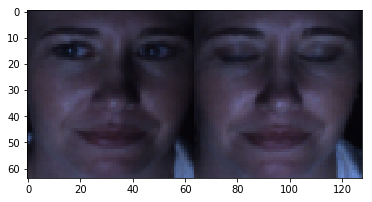

label of this pair is: 	 different faces


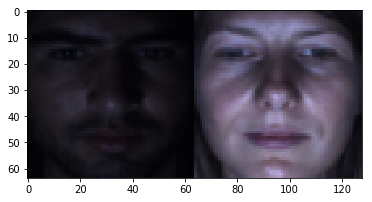

In [ ]:

def PlotAndVerifyRandomPair(dataset):
    """
    Function: 
        plot random pair images with the label to verify the datset is set
    right or wrong.
    """
    # select a random index
    ind = np.random.randint(len(dataset))
    # read image pair
    img1 = ReadImage(dataset[ind][0])
    img2 = ReadImage(dataset[ind][1])
    # read label
    label = float(dataset[ind][2])
    if label > 1:
        label_show = "same face"
    else:
        label_show = "different faces"
    # plot images
    display_imgs = np.concatenate([img1, img2], axis = 1)
    print("label of this pair is: \t", label_show)
    plt.imshow(display_imgs)
    plt.show()
    
PlotAndVerifyRandomPair(same_faces)
PlotAndVerifyRandomPair(diff_faces)
    

In [ ]:
import random

def CreateTrainAndValidationSet(same_faces, diff_faces, validation_rate = 0.01):
    """
    Function:
        Shuffle the dataset and separate the dataset into training set and 
    validation set
    """
    # backup the data for shuffling
    same_faces_shuf = same_faces
    diff_faces_shuf = diff_faces
    # define number of validation data w.r.t each class
    same_validate_num = int(len(same_faces) * validation_rate)
    diff_validate_num = int(len(diff_faces) * validation_rate)
    # get shuffled data
    random.shuffle(same_faces_shuf)
    random.shuffle(diff_faces_shuf)
    # define training and validation set
    valid_set = same_faces_shuf[:same_validate_num] + diff_faces_shuf[:diff_validate_num]
    train_set = same_faces_shuf[same_validate_num:] + diff_faces_shuf[diff_validate_num:]
    # shuffle the training set and validation set again
    random.shuffle(train_set)
    random.shuffle(valid_set)
    return train_set, valid_set

train_set_pathes, valid_set_pathes = CreateTrainAndValidationSet(same_faces, diff_faces)

print("Size of training set is: \t", len(train_set_pathes))
print("Size of validation set is: \t", len(valid_set_pathes))


Size of training set is: 	 104515
Size of validation set is: 	 1055


In [ ]:

def GetInputAndOutput(data_pathes):
    """
    Function:
        get all input data and labels
    """
    inputs = []
    labels = []
    # get every data in each batch
    for i in range(len(data_pathes)):
        current_data = data_pathes[i]
        # read images (resized)
        img1 = ReadImage(current_data[0])
        img2 = ReadImage(current_data[1])
        # concatenate images
        img_concat = np.concatenate([img1, img2], axis = 0)
        # reshape input data
        each_input = img_concat.reshape((-1,))
        # get label as one hot format
        label_ind = int(current_data[2])
        label = np.zeros((2,)).astype(np.float32)
        label[label_ind] = 1.
        # orgnizing input and output
        inputs.append(each_input)
        labels.append(label)
    inputs = np.array(inputs)
    labels = np.array(labels)
    return (inputs, labels)

# get validation set first
validation_set = GetInputAndOutput(valid_set_pathes)
print(validation_set[0].shape)


(1055, 24576)


In [ ]:
##### set specific gpu #####
import os
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"]="1"
##### start other dependencies #####
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

def InputAndOutputGenerator(data_pathes, batch_size = 10):
    """
    Function:
        Since when transfer into images, dataset is too big to read it all at once, a generator
    is created to generate the data according to the batch_size
    """
    # get number of batches
    num_batch = len(data_pathes) // batch_size
    for batch_id in range(num_batch):
        # get batch data
        data_path_batch = data_pathes[batch_id*batch_size: (batch_id+1)*batch_size]
        batch_inputs = []
        batch_labels = []
        # get every data in each batch
        for i in range(len(data_path_batch)):
            current_data = data_path_batch[i]
            # read images (resized)
            img1 = ReadImage(current_data[0])
            img2 = ReadImage(current_data[1])
            # concatenate images
            img_concat = np.concatenate([img1, img2], axis = 0)
            # reshape input data
            each_input = img_concat.reshape((-1,))
            # get label as one hot format
            label_ind = int(current_data[2])
            label = np.zeros((2,)).astype(np.float32)
            label[label_ind] = 1.
            # orgnizing input and output
            batch_inputs.append(each_input)
            batch_labels.append(label)
        batch_inputs = np.array(batch_inputs)
        batch_labels = np.array(batch_labels)
        yield (batch_inputs, batch_labels)

def MLPModel():
    """
    Building the MLP model
    """
    model = Sequential()
    # structure: (batch, 128*64*3) -> (batch, 1024) -> (batch, 256) -> (batch, 64) -> (batch, 10)
    model.add(Dense(units = 256, activation = "relu", input_dim = 128 * 64 * 3))
    model.add(Dense(units = 64, activation = "relu"))
    model.add(Dense(units = 2, activation = "softmax"))
    # using cross entropy as loss and adam as optimizer
    model.compile(loss='categorical_crossentropy',
                  optimizer=Adam(lr = 1e-3),
                  metrics=['accuracy'])
    return model

# define model.fit_generator parameters.
batch_size = 512
num_batch_train = len(train_set_pathes) // batch_size

# if already trained, skip training
if os.path.exists("original_MLP_trainloss.npy"):
    print("Training process and validation process are saved in numpy array files.")
else:
    # gpu memory
    config = tf.ConfigProto()
    config.gpu_options.allow_growth = True
    keras.backend.tensorflow_backend.set_session(tf.Session(config=config))

    # get model
    model = MLPModel()

    # training and validating on each batch
    epoches = 20
    train_loss = []
    train_acc = []
    valid_loss = []
    valid_acc = []
    for each_epoch in tqdm(range(epoches)):
        count = 0
        for data_train in InputAndOutputGenerator(train_set_pathes, batch_size):
            count += 1
            train_los_metr =  model.train_on_batch(data_train[0], data_train[1])
            val_los_metr = model.evaluate(validation_set[0], validation_set[1], verbose=0)
            train_loss.append(train_los_metr[0])
            train_acc.append(train_los_metr[1])
            valid_loss.append(val_los_metr[0])
            valid_acc.append(val_los_metr[1])
            print("current_batch: {}/{}, train_loss: {}, train_acc: {}, valid_loss: {}, valid_acc: {}"\
                  .format(count, num_batch_train, train_los_metr[0], train_los_metr[1], val_los_metr[0], val_los_metr[1]), end = "\r")

    np.save("original_MLP_trainloss.npy", np.array(train_loss))
    np.save("original_MLP_trainacc.npy", np.array(train_acc))
    np.save("original_MLP_validloss.npy", np.array(valid_loss))
    np.save("original_MLP_validacc.npy", np.array(valid_acc))


/usr/local/lib/python3.5/dist-packages/tensorflow/python/framework/dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.5/dist-packages/tensorflow/python/framework/dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.5/dist-packages/tensorflow/python/framework/dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.5/dist-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or 

The accuracy of validation set: 	 0.9706161137440759


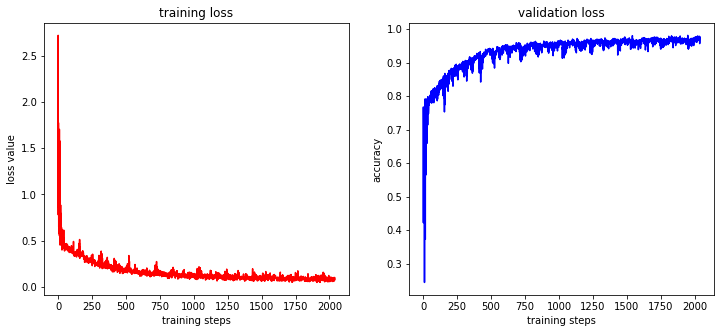

In [48]:

train_los = np.load("original_MLP_trainloss.npy")
train_acc = np.load("original_MLP_trainacc.npy")
valid_los = np.load("original_MLP_validloss.npy")
valid_acc = np.load("original_MLP_validacc.npy")

print("The accuracy of validation set: \t", valid_acc[-1])

display_steps = int(0.5 * len(train_los))
fig = plt.figure(figsize = (12, 5))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
ax1.plot(train_los[:display_steps], 'r')
ax1.set_title("training loss")
ax1.set_xlabel("training steps")
ax1.set_ylabel("loss value")
ax2.plot(valid_acc[:display_steps], 'b')
ax2.set_title("validation loss")
ax2.set_xlabel("training steps")
ax2.set_ylabel("accuracy")
plt.show()



In [26]:
import re

def TestAnnotate(img1_path, img2_path):
    """
    Function:
        Get the annotation of the test set.
    Principle:
        If two images belong to the same subset, they are showing the same face.
    """
    # find the subset number
    img1_sub_searcher = re.search("\d", img1_path)
    img2_sub_searcher = re.search("\d", img2_path)
    img1_sub_ind = int(img1_path[img1_sub_searcher.start(): img1_sub_searcher.start()+2])
    img2_sub_ind = int(img2_path[img2_sub_searcher.start(): img1_sub_searcher.start()+2])
    # compare subset number
    if img1_sub_ind == img2_sub_ind:
        label = 1
    else:
        label = 0
    return [img1_path, img2_path, str(label)]
    

def TestSetLoop(all_test_im_path):
    """
    Function:
        loop over each pair of test images, define labels, and save them
    """
    data = []
    dataset_file = open("data_test.txt", "w+")
    with tqdm(total=len(all_test_im_path)) as pbar:
        while len(all_test_im_path) > 0:
            current_image_path = all_test_im_path[0]
            all_test_im_path.remove(current_image_path)
            for another_img_path in all_test_im_path:
                data = TestAnnotate(current_image_path, another_img_path)
                dataset_file.write(data[0] + "," + data[1] + "," + data[2] + "," + "\n")
            pbar.update(1)

def CreateTestSet():
    """
    Function:
        create the test set file
    """
    all_test_im_path = GetAllImagePathes(sub_names_test, session_names, frame_names_test)
    print("There are totally ", len(all_test_im_path), " testing images.")

    # get dataset and save it into a data.txt file
    print("------------- starting storing dataset (test) -------------")
    TestSetLoop(all_test_im_path)
    print("-------------- end of storing dataset (test) --------------")
    
    
# read the saved data_test.txt, if exits and contains all data, skip the annotation part
if os.path.exists('data_test.txt'):
    testinfo = os.stat('data_test.txt')
    # get size as MB
    exist_testset_size = testinfo.st_size / 1024 / 1024
    # total size is around 6 MB
    if exist_testset_size > 6:
        print("------------------------ dataset already exists -------------------------")
    else:
        CreateTestSet()
else:
    CreateTestSet()


 11%|█         | 42/384 [00:00<00:00, 419.59it/s]

There are totally  384  testing images.
------------- starting storing dataset (test) -------------


100%|██████████| 384/384 [00:00<00:00, 938.90it/s]

-------------- end of storing dataset (test) --------------


In [37]:
import time

def ReadDatasetTxt(data_filename, NCC_threshold):
    """
    Function:
        read the dataset saved above, to find out some
        basical info about the dataset.
    """
    data_file = open(data_filename, "r")
    same_faces = []
    diff_faces = []
    for line in data_file:
        current_line = line.split(",")
        # find out it is same faces pair or different faces pair
        if float(current_line[2]) > NCC_threshold:
            same_faces.append([current_line[0], current_line[1], str(1)])
        else:
            diff_faces.append([current_line[0], current_line[1], str(0)])
    data_file.close()
    return same_faces, diff_faces

def ReadShuffleTestData(data_filename):
    """
    Function:
        read the shuffle test data
    """
    data_file = open(data_filename, "r")
    all_data = []
    for line in data_file:
        current_line = line.split(",")
        all_data.append(current_line)
    random.shuffle(all_data)
    return all_data

def TestOnBatch(test_set):
    """
    Function:
        Validate the model on the test set.
    """
    batch_count = 0
    # same batch size as used before
    batch_size = 512
    total_batch = len(test_set) // batch_size
    total_time = []
    # test on batch since the dataset size is too big
    for data_test in InputAndOutputGenerator(test_set, batch_size):
        start_time = time.time()
        test_result =  model.test_on_batch(data_test[0], data_test[1])
        print("current batch: {}/{}, test batch result: {}".format(batch_count, total_batch, \
                                                                   test_result), end="\r")
        time_duration = (time.time() - start_time) / batch_size
        total_time.append(time_duration)
        batch_count += 1
    print("---------------------- test results ---------------------------")
    average_time = sum(total_time) / total_batch
    return test_result[1], average_time

# specify test data
data_test_name = "data_test.txt"
# shuffle all data
test_set = ReadShuffleTestData(data_test_name)
# get same face images and different faces images seperately
test_same, test_diff = ReadDatasetTxt(data_test_name, 0.5)

# print out the size of the sets
print("There are totally ", len(test_set), " pairs of images inside the test set,")
print("With ", len(test_same), " pairs showing same faces,")
print("And ", len(test_diff), " pairs showing different faces,")

print("\n")
test_same, time_same = TestOnBatch(test_same)
print("Accuracy of the same face data:\t", test_same, " average prediction time:\t", time_same)
test_diff, time_diff = TestOnBatch(test_diff)
print("Accuracy of the different face data:\t", test_diff, " average prediction time:\t", time_diff)
test_all, time_all = TestOnBatch(test_set)
print("Accuracy of the all data:\t", test_all, " average prediction time:\t", time_all)


There are totally  73536  pairs of images inside the test set,
With  8448  pairs showing same faces,
And  65088  pairs showing different faces,


---------------------- test results ---------------------------]]
Accuracy of the same face data:	 0.81640625  average prediction time:	 0.00013825978385284543
---------------------- test results ---------------------------]2]]
Accuracy of the different face data:	 0.203125  average prediction time:	 0.00012238042825084972
---------------------- test results ---------------------------]]]
Accuracy of the all data:	 0.41015625  average prediction time:	 0.0001085121217151205


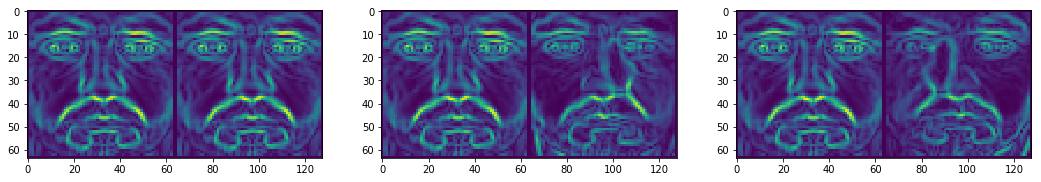

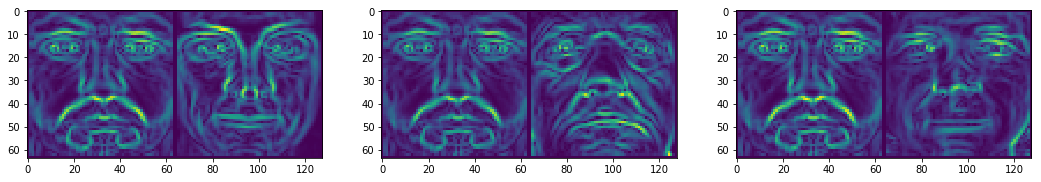

In [67]:
from skimage.color import rgb2gray
from skimage.exposure import equalize_hist
from skimage.filters import roberts, sobel

def GrayGradient(img):
    """
    Function: 
        Find the gradient of the image after grayscaled
    """
    gray_img = rgb2gray(img)
    return sobel(gray_img)

def GrayHistGradient(img):
    """
    Function:
        Apply histogram equalization on the grayscaled image first,
    then find the gradient.
    """
    gray_img = rgb2gray(img)
    gray_hist = equalize_hist(gray_img)
    return sobel(gray_hist)

# try image processing skills on all the example images
image_processsample_1 = GrayHistGradient(image_example_1)
image_processsample_2 = GrayHistGradient(image_example_2)
image_processsample_3 = GrayHistGradient(image_example_3)
image_processsample_4 = GrayHistGradient(image_example_4)
image_processsample_5 = GrayHistGradient(image_example_5)
image_processsample_6 = GrayHistGradient(image_example_6)
image_processsample_7 = GrayHistGradient(image_example_7)

# try with same faces but different illumination
sample1 = np.concatenate([image_processsample_1, image_processsample_2], axis = 1)
sample2 = np.concatenate([image_processsample_1, image_processsample_3], axis = 1)
sample3 = np.concatenate([image_processsample_1, image_processsample_4], axis = 1)
# try with different faces with different illumination
sample4 = np.concatenate([image_processsample_1, image_processsample_5], axis = 1)
sample5 = np.concatenate([image_processsample_1, image_processsample_6], axis = 1)
sample6 = np.concatenate([image_processsample_1, image_processsample_7], axis = 1)

# show results of the same faces
fig = plt.figure(figsize = (18, 6))
ax1 = fig.add_subplot(131)
ax2 = fig.add_subplot(132)
ax3 = fig.add_subplot(133)
ax1.imshow(sample1)
ax2.imshow(sample2)
ax3.imshow(sample3)
plt.show()

# show results of different faces
fig = plt.figure(figsize = (18, 6))
ax1 = fig.add_subplot(131)
ax2 = fig.add_subplot(132)
ax3 = fig.add_subplot(133)
ax1.imshow(sample4)
ax2.imshow(sample5)
ax3.imshow(sample6)
plt.show()


In [72]:
# try differences betwwen correlation, convolution and squared differences
# try with same faces but different illumination
compare_process_1 = CompareAllTricks(image_processsample_1, image_processsample_2)
compare_process_2 = CompareAllTricks(image_processsample_1, image_processsample_3)
compare_process_3 = CompareAllTricks(image_processsample_1, image_processsample_4)
# try with different faces with different illumination
compare_process_4 = CompareAllTricks(image_processsample_1, image_processsample_5)
compare_process_5 = CompareAllTricks(image_processsample_1, image_processsample_6)
compare_process_6 = CompareAllTricks(image_processsample_1, image_processsample_7)

print("---------------------------------- same faces ------------------------------------")
print("NCC:{} \t \t \t Conv:{} \t SSD:{}".format(compare_process_1[0], compare_process_1[1], compare_process_1[2]))
print("NCC:{} \t \t Conv:{} \t SSD:{}".format(compare_process_2[0], compare_process_2[1], compare_process_2[2]))
print("NCC:{} \t \t Conv:{} \t SSD:{}".format(compare_process_3[0], compare_process_3[1], compare_process_3[2]))
print("------------------------------- different faces ----------------------------------")
print("NCC:{} \t Conv:{} \t \t SSD:{}".format(compare_process_4[0], compare_process_4[1], compare_process_4[2]))
print("NCC:{} \t \t Conv:{} \t \t SSD:{}".format(compare_process_5[0], compare_process_5[1], compare_process_5[2]))
print("NCC:{} \t Conv:{} \t SSD:{}".format(compare_process_6[0], compare_process_6[1], compare_process_6[2]))

---------------------------------- same faces ------------------------------------
NCC:1.0 	 	 	 Conv:10.299337974386301 	 SSD:0.0
NCC:0.6437321093741377 	 	 Conv:5.894110549158487 	 SSD:27.959761674595217
NCC:0.5406864598272316 	 	 Conv:6.228113642589015 	 SSD:35.20275397658082
------------------------------- different faces ----------------------------------
NCC:0.33668983078137077 	 Conv:8.2089805868561 	 	 SSD:52.75581744084407
NCC:0.1830068066905664 	 	 Conv:6.92714501030044 	 	 SSD:71.95477768337645
NCC:0.28816781072249525 	 Conv:5.101868966695818 	 SSD:51.75210315429355


In [83]:

# applying image pre-processing to the new classifier
def NewClassifier(im1_path, im2_path):
    """
    Function: 
        Apply pre-processing before cross-correlation
    """
    # read images
    image1 = GrayHistGradient(ReadImage(im1_path))
    image2 = GrayHistGradient(ReadImage(im2_path))
    # find pair scores
    NCC_score = NormalizedCrossCorrelation(image1, image2)
    
    return [im1_path, im2_path, str(NCC_score)]

def NewDatasetLoop(all_train_im_path):
    """
    Function:
        loop over each pair of images, classify them with new trick.
    """
    # loop over each pair, define the label and save as data.txt file
    data = []
    dataset_file = open("data_new.txt", "w+")
    with tqdm(total=460) as pbar:
        while len(all_train_im_path) > 0:
            current_image_path = all_train_im_path[0]
            all_train_im_path.remove(current_image_path)
            for another_img_path in all_train_im_path:
                data = NewClassifier(current_image_path, another_img_path)
                dataset_file.write(data[0] + "," + data[1] + "," + data[2] + "," + "\n")
            pbar.update(1)

def CreatNewDataset():
    """
    Function:
        create the dataset.
    """
    # get all training image pathes
    all_train_im_path = GetAllImagePathes(sub_names_train, session_names, frame_names_train)
    print("There are totally ", len(all_train_im_path), " training images.")

    # get dataset and save it into a data.txt file
    print("------------- starting storing dataset -------------")
    NewDatasetLoop(all_train_im_path)
    print("-------------- end of storing dataset --------------")
    

# read the saved data.txt, if exits and contains all data, skip the annotation part
if os.path.exists('data_new.txt'):
    statinfo_new = os.stat('data_new.txt')
    # get size as MB
    exist_new_dataset_size = statinfo_new.st_size / 1024 / 1024
    # total size is around 8 MB
    if exist_new_dataset_size > 8:
        print("------------------------ dataset already exists -------------------------")
    else:
        CreatNewDataset()
else:
    CreatNewDataset()

  0%|          | 0/460 [00:00<?, ?it/s]

There are totally  460  training images.
------------- starting storing dataset -------------


100%|██████████| 460/460 [40:32<00:00,  5.29s/it] 

-------------- end of storing dataset --------------


In [91]:
# setting threshold for same faces
new_NCC_threshold = 0.53
new_dataset_name = "data_new.txt"
new_same_faces, new_diff_faces = ReadDatasetTxt(new_dataset_name, new_NCC_threshold)

print("There are totally ", len(new_same_faces) + len(new_diff_faces), " pairs of images inside the datset,")
print("With ", len(new_same_faces), " pairs showing same faces,")
print("And ", len(new_diff_faces), " pairs showing different faces,")

There are totally  105570  pairs of images inside the datset,
With  9394  pairs showing same faces,
And  96176  pairs showing different faces,


In [96]:
train_new_pathes, valid_new_pathes = CreateTrainAndValidationSet(new_same_faces, new_diff_faces)

print("Size of training set is: \t", len(train_new_pathes))
print("Size of validation set is: \t", len(valid_new_pathes))

def GetInputAndOutputNew(data_pathes):
    """
    Function:
        get all input data and labels
    """
    inputs = []
    labels = []
    # get every data in each batch
    for i in range(len(data_pathes)):
        current_data = data_pathes[i]
        # read images (resized)
        img1 = GrayHistGradient(ReadImage(current_data[0]))
        img2 = GrayHistGradient(ReadImage(current_data[1]))
        # concatenate images
        img_concat = np.concatenate([img1, img2], axis = 0)
        # reshape input data
        each_input = img_concat.reshape((-1,))
        # get label as one hot format
        label_ind = int(current_data[2])
        label = np.zeros((2,)).astype(np.float32)
        label[label_ind] = 1.
        # orgnizing input and output
        inputs.append(each_input)
        labels.append(label)
    inputs = np.array(inputs)
    labels = np.array(labels)
    return (inputs, labels)

# get validation set first
validation_set_new = GetInputAndOutputNew(valid_new_pathes)
print(validation_set_new[0].shape)

Size of training set is: 	 104516
Size of validation set is: 	 1054
(1054, 8192)


In [97]:

def InputAndOutputGeneratorNew(data_pathes, batch_size = 10):
    """
    Function:
        Since when transfer into images, dataset is too big to read it all at once, a generator
    is created to generate the data according to the batch_size
    """
    # get number of batches
    num_batch = len(data_pathes) // batch_size
    for batch_id in range(num_batch):
        # get batch data
        data_path_batch = data_pathes[batch_id*batch_size: (batch_id+1)*batch_size]
        batch_inputs = []
        batch_labels = []
        # get every data in each batch
        for i in range(len(data_path_batch)):
            current_data = data_path_batch[i]
            # read images (resized)
            img1 = GrayHistGradient(ReadImage(current_data[0]))
            img2 = GrayHistGradient(ReadImage(current_data[1]))
            # concatenate images
            img_concat = np.concatenate([img1, img2], axis = 0)
            # reshape input data
            each_input = img_concat.reshape((-1,))
            # get label as one hot format
            label_ind = int(current_data[2])
            label = np.zeros((2,)).astype(np.float32)
            label[label_ind] = 1.
            # orgnizing input and output
            batch_inputs.append(each_input)
            batch_labels.append(label)
        batch_inputs = np.array(batch_inputs)
        batch_labels = np.array(batch_labels)
        yield (batch_inputs, batch_labels)
        
def NewMLPModel():
    """
    Building the MLP model
    """
    model = Sequential()
    # structure: (batch, 128*64) -> (batch, 1024) -> (batch, 256) -> (batch, 64) -> (batch, 10)
    model.add(Dense(units = 256, activation = "relu", input_dim = 128 * 64))
    model.add(Dense(units = 64, activation = "relu"))
    model.add(Dense(units = 2, activation = "softmax"))
    # using cross entropy as loss and adam as optimizer
    model.compile(loss='categorical_crossentropy',
                  optimizer=Adam(lr = 1e-3),
                  metrics=['accuracy'])
    return model

In [ ]:
##### set specific gpu #####
import os
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"]="1"

# define model.fit_generator parameters.
batch_size = 512
num_batch_train_new = len(train_new_pathes) // batch_size

# if already trained, skip training
if os.path.exists("new_MLP_trainloss.npy"):
    print("Training process and validation process are saved in numpy array files.")
else:
    # gpu memory
    config = tf.ConfigProto()
    config.gpu_options.allow_growth = True
    keras.backend.tensorflow_backend.set_session(tf.Session(config=config))

    # get model
    model_new = NewMLPModel()

    # training and validating on each batch
    epoches = 20
    train_loss_new = []
    train_acc_new = []
    valid_loss_new = []
    valid_acc_new = []
    for each_epoch in tqdm(range(epoches)):
        count = 0
        for data_train_new in InputAndOutputGeneratorNew(train_new_pathes, batch_size):
            count += 1
            train_los_metr_new =  model_new.train_on_batch(data_train_new[0], data_train_new[1])
            val_los_metr_new = model_new.evaluate(validation_set_new[0], validation_set_new[1], verbose=0)
            train_loss_new.append(train_los_metr_new[0])
            train_acc_new.append(train_los_metr_new[1])
            valid_loss_new.append(val_los_metr_new[0])
            valid_acc_new.append(val_los_metr_new[1])
            print("current_batch: {}/{}, train_loss: {}, train_acc: {}, valid_loss: {}, valid_acc: {}"\
                  .format(count, num_batch_train_new, train_los_metr_new[0], train_los_metr_new[1], \
                          val_los_metr_new[0], val_los_metr_new[1]), end = "\r")

    np.save("new_MLP_trainloss.npy", np.array(train_loss_new))
    np.save("new_MLP_trainacc.npy", np.array(train_acc_new))
    np.save("new_MLP_validloss.npy", np.array(valid_loss_new))
    np.save("new_MLP_validacc.npy", np.array(valid_acc_new))



  0%|          | 0/20 [00:00<?, ?it/s]

In [ ]:

train_los_new = np.load("new_MLP_trainloss.npy")
train_acc_new = np.load("new_MLP_trainacc.npy")
valid_los_new = np.load("new_MLP_validloss.npy")
valid_acc_new = np.load("new_MLP_validacc.npy")

print("The accuracy of validation set: \t", valid_acc_new[-1])

display_steps = int(0.5 * len(train_los_new))
fig = plt.figure(figsize = (12, 5))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
ax1.plot(train_los_new[:display_steps], 'r')
ax1.set_title("training loss")
ax1.set_xlabel("training steps")
ax1.set_ylabel("loss value")
ax2.plot(valid_acc_new[:display_steps], 'b')
ax2.set_title("validation loss")
ax2.set_xlabel("training steps")
ax2.set_ylabel("accuracy")
plt.show()


In [ ]:

def TestOnBatch(test_set):
    """
    Function:
        Validate the model on the test set.
    """
    batch_count = 0
    # same batch size as used before
    batch_size = 512
    total_batch = len(test_set) // batch_size
    total_time = []
    # test on batch since the dataset size is too big
    for data_test in InputAndOutputGenerator(test_set, batch_size):
        start_time = time.time()
        test_result =  model.test_on_batch(data_test[0], data_test[1])
        print("current batch: {}/{}, test batch result: {}".format(batch_count, total_batch, \
                                                                   test_result), end="\r")
        time_duration = (time.time() - start_time) / batch_size
        total_time.append(time_duration)
        batch_count += 1
    print("---------------------- test results ---------------------------")
    average_time = sum(total_time) / total_batch
    return test_result[1], average_time

test_same, time_same = TestOnBatch(test_same)
print("Accuracy of the same face data:\t", test_same, " average prediction time:\t", time_same)
test_diff, time_diff = TestOnBatch(test_diff)
print("Accuracy of the different face data:\t", test_diff, " average prediction time:\t", time_diff)
test_all, time_all = TestOnBatch(test_set)
print("Accuracy of the all data:\t", test_all, " average prediction time:\t", time_all)
